<a href="https://colab.research.google.com/github/kritikaa-srivastavaa/Heart-Failure-Prediction/blob/main/Heart_Failure_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Heart Failure Prediction**



IMPORTING LIBRARIES

In [ ]:
#Importing python libraries

#Data Preprocessing
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler as ss

#Data Visualization
import plotly.express as px
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

#Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#Model Training and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix , precision_score, recall_score
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import model_selection


%matplotlib inline

IMPORTING THE DATASET

In [ ]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
data.shape

(299, 13)

INFORMATION ABOUT DATASET

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [ ]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
data.duplicated().sum()

0

DATA VISUALISATION

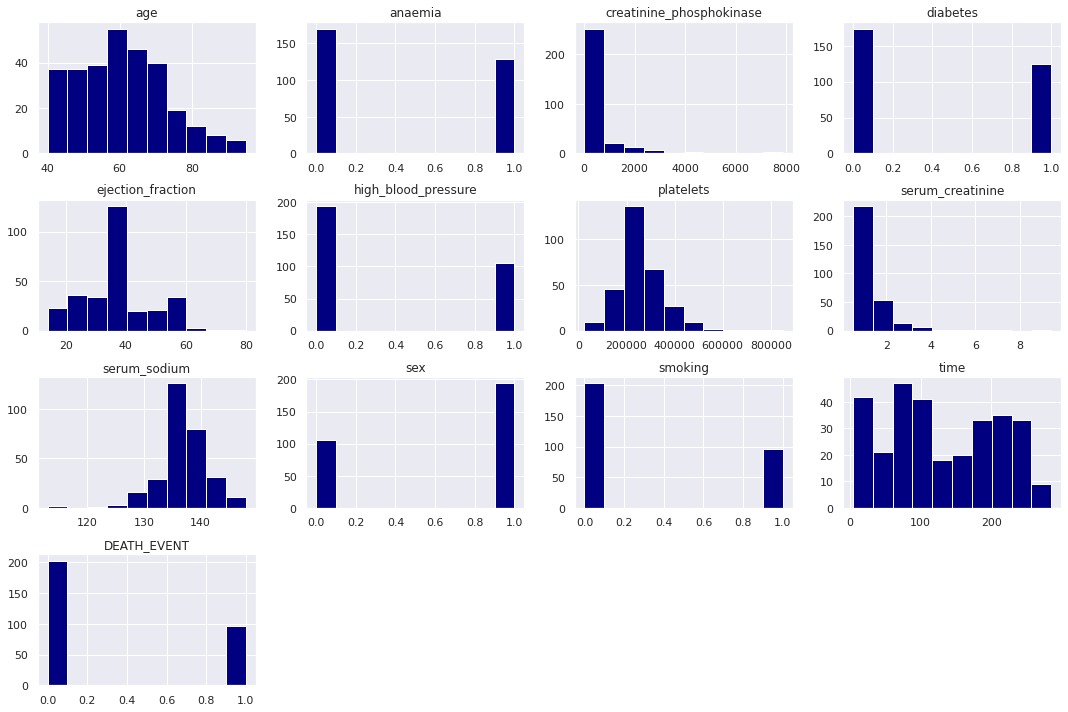

In [ ]:
#Displaying values of different columns of dataset
data.hist(bins=10, figsize=(15, 10), color="#000080")
plt.tight_layout()

Explanation:

1. This dataset belongs to people with ages between 40 & 90.
2. Illness- Anaemia, Diabetes, High Blood Pressure, and Smoking plots shown above exhibit whether individuals suffer from them(1) or not(0)
3. 'Death Event' column shows whether the person is alive or dead due to heart failure.
4. Sex column represents the gender of the individual, i.e.,man or woman.
5. The levels of creatinine phosphokinase, serum sodium, platelets count and serum creatinine are depicted in their specific plots.


In [ ]:
dv= data.copy()

#Changing values 1, 0 to have the issue or not
dv['anaemia'] = np.where(dv['anaemia'] == 1, 'Anaemic', 'Non-Anaemic')
dv['diabetes'] = np.where(dv['diabetes'] == 1, 'Diabetic', 'Non-Diabetic')
dv['high_blood_pressure'] = np.where(dv['high_blood_pressure'] == 1, 'High', 'Normal')
dv['sex'] = np.where(dv['sex'] == 1, 'Male', 'Female')
dv['smoking'] = np.where(dv['smoking'] == 1, 'Smoker', 'Non-Smoker')
dv['DEATH_EVENT'] = np.where(dv['DEATH_EVENT'] == 0, 'Alive', 'Deceased')

#explore first five rows in the dataset
dv.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,Non-Anaemic,582,Non-Diabetic,20,High,265000.00,1.9,130,Male,Non-Smoker,4,Deceased
1,55.0,Non-Anaemic,7861,Non-Diabetic,38,Normal,263358.03,1.1,136,Male,Non-Smoker,6,Deceased
2,65.0,Non-Anaemic,146,Non-Diabetic,20,Normal,162000.00,1.3,129,Male,Smoker,7,Deceased
3,50.0,Anaemic,111,Non-Diabetic,20,Normal,210000.00,1.9,137,Male,Non-Smoker,7,Deceased
4,65.0,Anaemic,160,Diabetic,20,Normal,327000.00,2.7,116,Female,Non-Smoker,8,Deceased


In [ ]:
#Visualizing Age, level of serum creatinine, level of serum sodium and ejection fraction
fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=("Age", "Level of serum creatinine", "Level of serum sodium", "Ejection fraction"))

#Age
fig.add_trace(go.Histogram(x=dv.age[dv['DEATH_EVENT'] == 'Deceased'], name='Deceased',
                          marker=dict(color='#d5a036', line=dict(width=1.5, color='#000000')),
                           xbins=dict(size=10 )),
                           row=1, col=1)
#Age
fig.add_trace(go.Histogram(x=dv.age[dv['DEATH_EVENT'] == 'Alive'], name='Alive',
                          marker=dict(color='#1984c5', line=dict(width=1.5, color='#000000')),
                           xbins=dict(size=10 )),row=1, col=1)
##level of serum creatinine
fig.add_trace(go.Histogram(x=dv.serum_creatinine[dv['DEATH_EVENT'] == 'Deceased'],
                           marker=dict(color='#d5a036', line=dict(width=1.5, color='#000000')),
                           showlegend=False,xbins=dict(size=25)),row=1, col=2)
##level of serum creatinine
fig.add_trace(go.Histogram(x=dv.serum_creatinine[dv['DEATH_EVENT'] == 'Alive'],
                           marker=dict(color='#1984c5', line=dict(width=1.5, color='#000000')),
                           showlegend=False,xbins=dict(size=25 )),row=1, col=2)
##level of serum sodium
fig.add_trace(go.Histogram(x=dv.serum_sodium[dv['DEATH_EVENT'] == 'Deceased'],
                           marker=dict(color='#d5a036', line=dict(width=1.5, color='#000000')),
                           showlegend=False,xbins=dict(size=25)),row=1, col=3)
##level of serum sodium
fig.add_trace(go.Histogram(x=dv.serum_sodium[dv['DEATH_EVENT'] == 'Alive'],
                           marker=dict(color='#1984c5', line=dict(width=1.5, color='#000000')),
                           showlegend=False,xbins=dict(size=25 )),row=1, col=3)
#Ejection Fraction
fig.add_trace(go.Histogram(x=dv.ejection_fraction [dv['DEATH_EVENT'] == 'Deceased'],
                           marker=dict(color='#d5a036', line=dict(width=1.5, color='#000000')),
                           showlegend=False,xbins=dict(size=5 )),row=1, col=4)
#Ejection Fraction
fig.add_trace(go.Histogram(x=dv.ejection_fraction [dv['DEATH_EVENT'] == 'Alive'],
                           marker=dict(color='#1984c5', line=dict(width=1.5, color='#000000')),
                           showlegend=False,xbins=dict(size=5 )),row=1, col=4)
#Tittle config
fig.update_layout(title_x=0.5,title_text="Heart failure deaths distribution by:", height=400,barmode='stack',font_family='Verdana',
                 font=dict(family="Verdana,Verdana",size=12),paper_bgcolor='#edeae7',plot_bgcolor='#edeae7')
#config opacity
fig.update_traces(opacity=0.80)

fig.show()


*Explanation:*

1. Age Plot:

  A. Given dataset contains people belonging to the age group 50-70.

  B. Heart Failure is highly probable in sixties.
  
  C. Most people in the age group 80-100 are prone to heart failure.
  
  D. Heart failure is less probable but still persists int the age group 40-50.


2. Serum Creatinine Plot:

  A. This plot shows unclear values of the level of sodium creatinine in blood.


3. Serum Sodium Plot:

  A. Almost all individuals have 130-150 mEq/l of serium sodium in their blood.


4. Ejection Fraction Plot:

  A. Ejection fraction of most people in given dataset is 35-40%.

  B. Ejection fraction's value varies widely among individuals ranging majorly from 20 to 70%.

  C. Heart failure occured mainly among people with ejection fraction between 20-30%.

  D. Heart failure is least seen when individual has an ejection fraction of about 70%.

In [ ]:
#Visualizing the median values of the above columns

#creating variable with median age, median level of sodium creatinine and median ejection_fraction
median_age=dv.groupby('DEATH_EVENT')['age'].median()
median_creatinine=dv.groupby('DEATH_EVENT')['serum_creatinine'].median()
median_sodium=dv.groupby('DEATH_EVENT')['serum_sodium'].median()
median_ejection_fraction=dv.groupby('DEATH_EVENT')['ejection_fraction'].median()
#reset index and sort values
median_age=median_age.reset_index().sort_values('age', ascending=False)
median_creatinine=median_creatinine.reset_index().sort_values('serum_creatinine',ascending=False )
median_sodium=median_sodium.reset_index().sort_values('serum_sodium')
median_ejection_fraction=median_ejection_fraction.reset_index().sort_values('ejection_fraction')
x_value = median_age.DEATH_EVENT

#making the plots
fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=("Age", "Level of serum creatinine", "Level of serum sodium", "Ejection fraction"))

#create bar plot

#Age
fig.add_trace(go.Bar(x=x_value,y=median_age.age, text=median_age.age,textposition='outside',showlegend=False,
          marker=dict(color=['#d5a036', '#1984c5'],line=dict(width=1.5, color='#000000'), opacity=0.9)),row=1, col=1)

#Serum creatinine
fig.add_trace(go.Bar(x=x_value,y=median_creatinine.serum_creatinine, text=median_creatinine.serum_creatinine,
                     showlegend=False, textposition='outside',
          marker=dict(color=['#d5a036', '#1984c5'],line=dict(width=1.5, color='#000000'), opacity=0.9)),row=1, col=2)

#Serum sodium
fig.add_trace(go.Bar(x=x_value,y=median_sodium.serum_sodium, text=median_sodium.serum_sodium,
                     showlegend=False, textposition='outside',
          marker=dict(color=['#d5a036', '#1984c5'],line=dict(width=1.5, color='#000000'), opacity=0.9)),row=1, col=3)

#ejection fraction
fig.add_trace(go.Bar(x=x_value,y=median_ejection_fraction.ejection_fraction, text=median_ejection_fraction.ejection_fraction,textposition='outside',showlegend=False,
          marker=dict(color=['#d5a036', '#1984c5'],line=dict(width=1.5, color='#000000'), opacity=0.9)),row=1, col=4)

#bar plot config
fig.update_layout(title_x=0.5,title_text="Median Values of:", height=450,font_family='Verdana',
                 font=dict(family="Verdana,Verdana",size=13),paper_bgcolor='#edeae7',plot_bgcolor='#edeae7')
#bar plot config
fig.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False,
                 marker_line_width=1.5,marker_line_color="black")

#config space subtitles
for i in range(0,4):
    fig.layout.annotations[i].update(y=1.05)

#bar plot config
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')

fig.show()

Explanation:

1. Age Plot:

  A. The median age of people who died of hear failure is 65 years.
  
  B. The median age of the alive people in the existing dataset is 60 years.


2. Serum Creatinine Plot:

  A. The median value of serum creatinine in blood of deceased individuals is 1.3 mg/dL.
  
  B. The median value of serum creatinine in blood of alive people in the existing datset is 1 mg/dL.
  
  C. The values coincides with the fact that increased level of creatinine is a sign of poor kidney function as contributes to heart failure.


3. Serum Sodium Plot:

  A. The median value of serum sodium in blood of deceased individuals is 135.5 mEq/L.
  
  B. The median value of serum sodium in blood of alive people in the existing datset is 137 mEq/L.
  
4. Ejection Fraction Plot:

  A. The median value of ejection fraction of deceased individuals is 30%.
  
  B. The median value of ejection fraction of alive people in the existing datset is 38%.

Text(0.5, 1.0, 'Relationship between Platelets count and heart failure deaths')

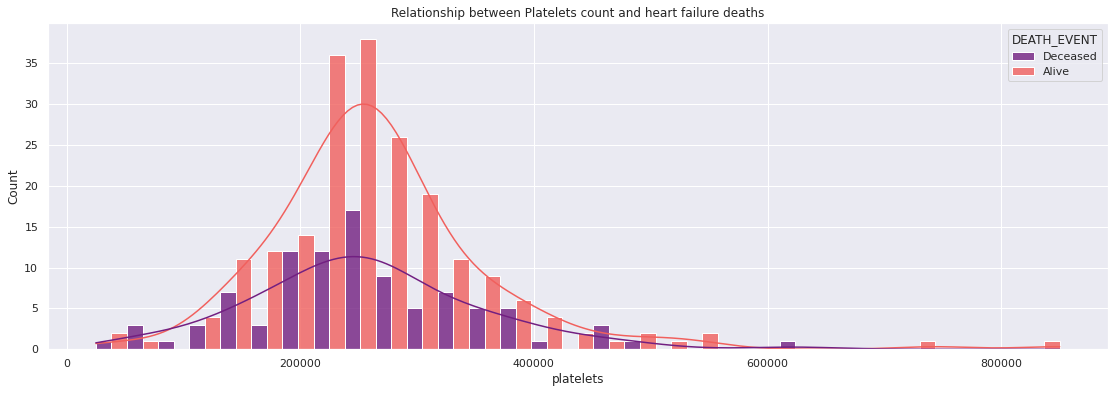

In [ ]:
#Visualizing the effect of platelets count
fig, axes = plt.subplots(1,1, figsize=(19,6))
sns.set()
sns.histplot(data=dv, x="platelets", alpha=0.8, hue = "DEATH_EVENT",kde=True, multiple="dodge", palette="magma")
plt.title("Relationship between Platelets count and heart failure deaths")

<b> Explanation: </b>
<n>
<ol>
<li> The graph coincides with the fact that the normal platelets count in the blood lies between 150K to 400K platelets/mcL</li>


---
<br>
<br>

Text(0.5, 1.0, 'Relationship between Creatinine Phosphokinase and heart failure deaths')

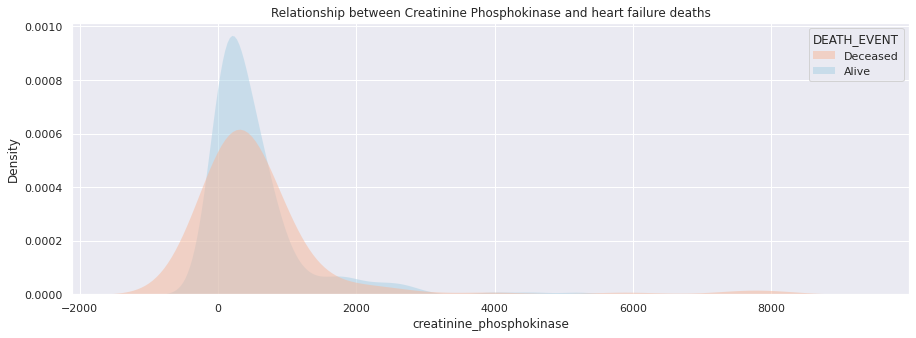

In [ ]:
#Visualizing the effect of creatinine phosphokinase count
fig, axes = plt.subplots(1,1, figsize=(15,5))
sns.set()
sns.kdeplot(x=dv["creatinine_phosphokinase"], hue=dv["DEATH_EVENT"], common_norm=False, palette="RdBu",
   alpha=.5, linewidth=0, shade=True)
plt.title("Relationship between Creatinine Phosphokinase and heart failure deaths")

In [ ]:
# Visualizing all the boolean columns

visu = pd.DataFrame()
#variable with 0 for the iteration
num = 0
#variable with the name of columns
variables = ['sex','high_blood_pressure','anaemia','diabetes','smoking']
#for loop to get the percentage of columns
for i in variables:
    num += 1
    temp = dv.groupby(i)['DEATH_EVENT'].value_counts(normalize=True)
    temp = temp.mul(100).rename('percentage' + str(num)).reset_index()
    visu = pd.concat([visu, temp], axis=1)

#drop diplicated values
visu = visu.loc[:, ~visu.columns.duplicated()]
visu = visu.round(decimals = 2)
#colors for the visualizations
color_rgb = ['rgb(25, 132, 197)','rgb(213, 160, 54)']
num = 0
#loop for creating visualizations
for i in variables:
    num +=1
    fig = px.histogram(visu, x=i, y='percentage' + str(num),
             color='DEATH_EVENT', barmode='group',
             text_auto=True,
             height=450, width = 600,color_discrete_sequence= color_rgb,opacity=0.8)
    #config plot
    fig.update_layout(title_x=0.5,title_text=(f"Heart failure deaths distribution by {i}"), height=450,font_family='Verdana',
                 font=dict(family="Verdana,Verdana",size=13),yaxis_title=None, xaxis_title= i,
                      paper_bgcolor='#edeae7',plot_bgcolor='#edeae7')

     #config plot
    fig.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False,
                 marker_line_width=1,marker_line_color="black")
    fig.update_yaxes(title="", ticksuffix='%')
    fig.show()

<b> Explanation: </b>
<ol>
<li> Sex Plot:
<n>
<ul>
<li> The percentage of heart failure in females is 32.28% </li>
<li> The percentage of heart failue in males is 31.96% </li>
<li> The graph shows that women are more prone to heart failures than men </li>
</ul>
<li> High Blood Pressure Plot:
<n>
<ul>
<li> Almost 40% of people with high blood pressure suffer heart failure</li>
<li> 30% of people with normal blood pressure also suffer heart failure </li>
</ul>
<li> Anaemia Plot:
<n>
<ul>
<li> 35.66% anaemic people suffer heart failure </li>
<li> 29.41% non-anaemic people suffer hear failure as well. </li>
</ul>
<li> Diabetes Plot:
<n>
<ul>
<li> 32% of people with diabetes suffer heart failure </li>
<li> 32% of all the non-diabetic people also suffer heart failure </li>
</ul>
<li> Smoking Plot:
<ul>
<li> 32% of people who smoke experience heart failures </li>
<li> 31.25% of people who do not smoke still suffer hear failure </li>
</ul>


---

<br>
<br>

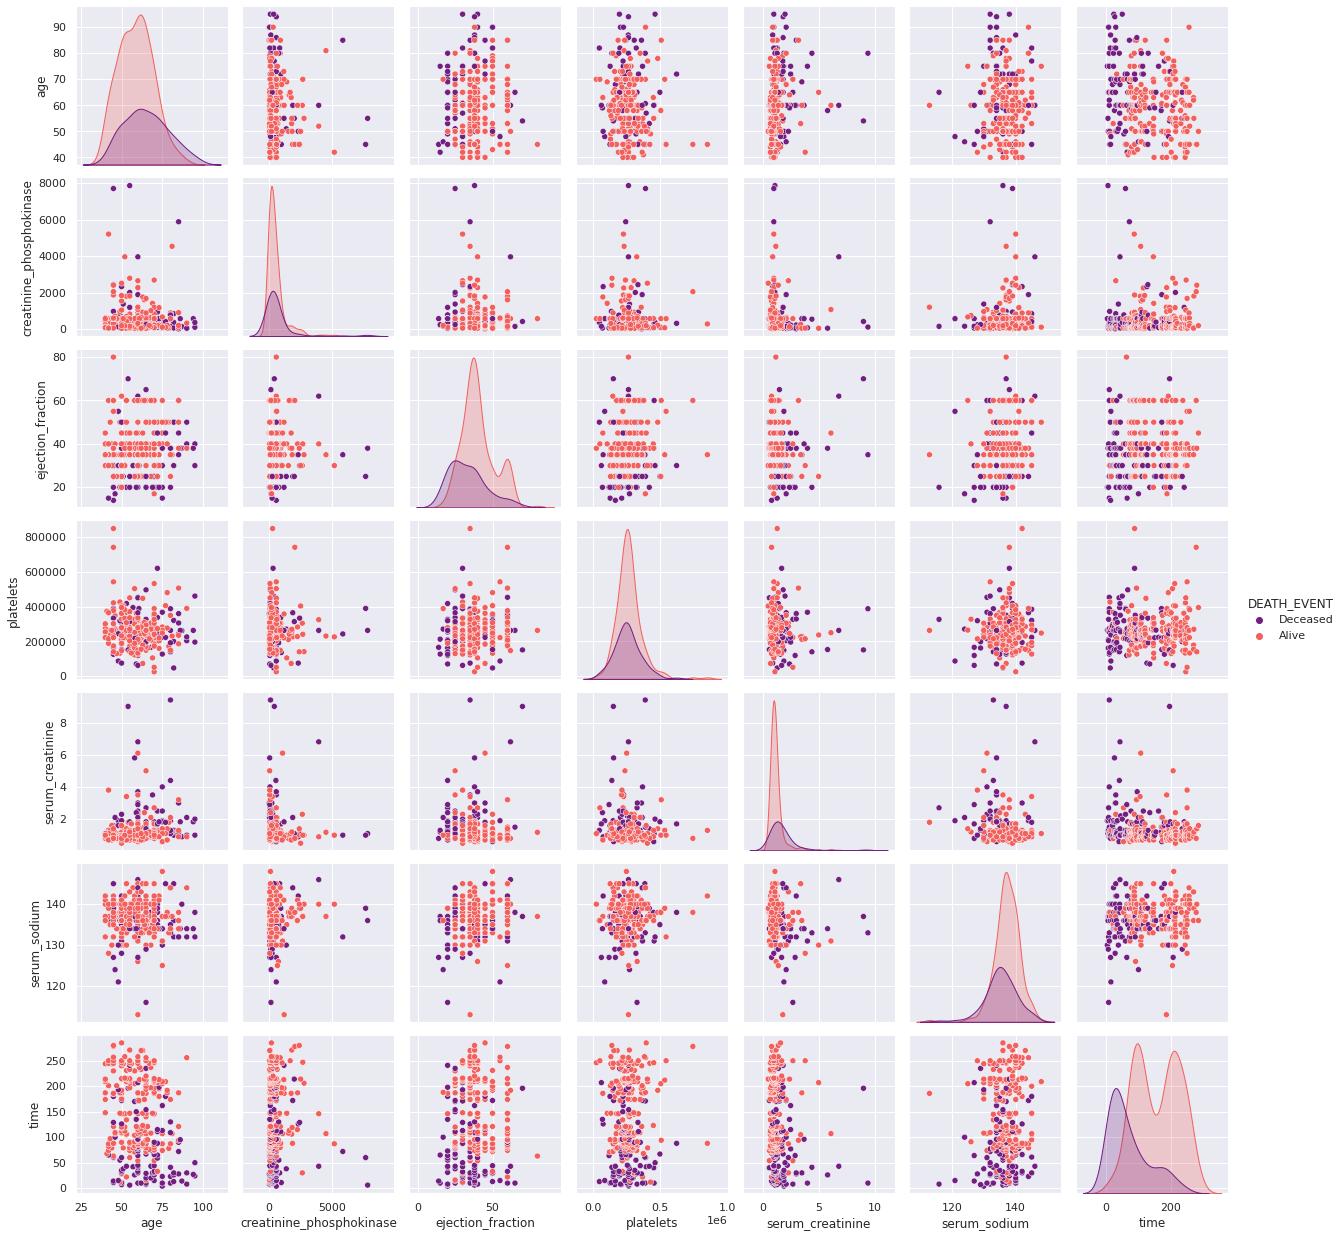

In [ ]:
sns.pairplot(dv,hue='DEATH_EVENT',palette='magma')

<b align="center"> Inter-relationship among all the factors causing heart failure </b>


---

<br>
<br>

In [ ]:
data.describe()[:].T.style.background_gradient(cmap='magma')

,count,mean,std,min,25%,50%,75%,max
age,299.000000,60.833893,11.894809,40.000000,51.000000,60.000000,70.000000,95.000000
anaemia,299.000000,0.431438,0.496107,0.000000,0.000000,0.000000,1.000000,1.000000
creatinine_phosphokinase,299.000000,581.839465,970.287881,23.000000,116.500000,250.000000,582.000000,7861.000000
diabetes,299.000000,0.418060,0.494067,0.000000,0.000000,0.000000,1.000000,1.000000
ejection_fraction,299.000000,38.083612,11.834841,14.000000,30.000000,38.000000,45.000000,80.000000
high_blood_pressure,299.000000,0.351171,0.478136,0.000000,0.000000,0.000000,1.000000,1.000000
platelets,299.000000,263358.029264,97804.236869,25100.000000,212500.000000,262000.000000,303500.000000,850000.000000
serum_creatinine,299.000000,1.393880,1.034510,0.500000,0.900000,1.100000,1.400000,9.400000
serum_sodium,299.000000,136.625418,4.412477,113.000000,134.000000,137.000000,140.000000,148.000000
sex,299.000000,0.648829,0.478136,0.000000,0.000000,1.000000,1.000000,1.000000


<b>Visualizing some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.


---


<br>
<br>


In [ ]:
fig = px.imshow(data.corr(), color_continuous_scale="magma")
fig.update_layout(height=750)
fig.show()

<b> Quick overview or exploratory analysis of data from the existing dataset


---

<br>
<br>

In [ ]:
# Oversampling(Upsampling) the minority class

from sklearn.utils import resample
#create two different dataframe of majority and minority class
data_majority = data[(data['DEATH_EVENT']==0)]
data_minority = data[(data['DEATH_EVENT']==1)]
# upsample minority class
df_minority_upsampled = resample(data_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 203, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([df_minority_upsampled, data_majority])

print(data_upsampled['DEATH_EVENT'].value_counts())
print(data_upsampled)

1    203
0    203
Name: DEATH_EVENT, dtype: int64
      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
59   72.0        0                       364         1                 20   
230  60.0        0                       166         0                 30   
15   82.0        1                       379         0                 50   
126  46.0        0                       168         1                 17   
72   85.0        0                      5882         0                 35   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure 

MACHINE LEARNING MODELS

In [ ]:
ddf=data_upsampled
x=ddf.drop(columns=['DEATH_EVENT'])
y=ddf['DEATH_EVENT']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler as ss
scs = ss()
x_train = scs.fit_transform(x_train)
x_test = scs.transform(x_test)

In [ ]:
model_test={}

MODEL 1- LOGISTIC REGRESSION

In [ ]:
lr=LogisticRegression(solver='lbfgs', max_iter=100)
lr.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred_test= lr.predict(x_test)
y_pred_test

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [ ]:
y_pred_train= lr.predict(x_train)
y_pred_train

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)

Training accuracy:
80.55555555555556


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Testing accuracy:
79.26829268292683


LOGICAL REGRESSION- CONFUSION MATRIX

In [ ]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[31  7]
 [10 34]]

True Positives(TP) =  31

True Negatives(TN) =  34

False Positives(FP) =  7

False Negatives(FN) =  10


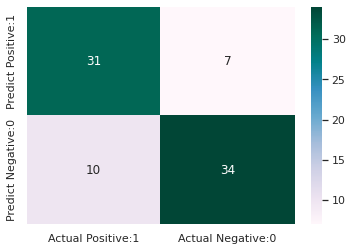

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='PuBuGn')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.78        38
           1       0.83      0.77      0.80        44

    accuracy                           0.79        82
   macro avg       0.79      0.79      0.79        82
weighted avg       0.80      0.79      0.79        82



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2073


In [ ]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
model_test['Logistic Regression']=[f1score , accuracy, precision, recall, classification_error]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)

f1 Score : 0.7999999999999999
Accuracy: 0.7926829268292683
Recall : 0.7727272727272727
Precision : 0.8292682926829268


MODEL 2-NAIVE BAYES CLASSIFIER

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred_test = gnb.predict(x_test)
y_pred_test

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0])

In [ ]:
y_pred_train = gnb.predict(x_train)
y_pred_train

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)

Training accuracy:
77.1604938271605


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Testing accuracy:
75.60975609756098


NAIVE BAYES CLASSIFIER- CONFUSION MATRIX

In [ ]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[35  3]
 [17 27]]

True Positives(TP) =  35

True Negatives(TN) =  27

False Positives(FP) =  3

False Negatives(FN) =  17


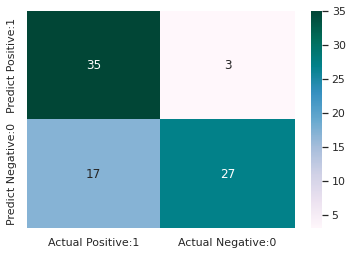

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='PuBuGn')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.92      0.78        38
           1       0.90      0.61      0.73        44

    accuracy                           0.76        82
   macro avg       0.79      0.77      0.75        82
weighted avg       0.79      0.76      0.75        82



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2439


In [ ]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
model_test['Naive Bayes']=[f1score , accuracy, precision, recall, classification_error]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)

f1 Score : 0.7297297297297297
Accuracy: 0.7560975609756098
Recall : 0.6136363636363636
Precision : 0.9


MODEL 3- XGBoost

In [ ]:
xg = XGBClassifier()
xg.fit(x_train, y_train)

XGBClassifier()

In [ ]:
y_pred_train = xg.predict(x_train)
#convert into binary values
for i in range(0, len(y_pred_train)):
    if y_pred_train[i]>= 0.5:       # setting threshold to .5
       y_pred_train[i]=1
    else:
       y_pred_train[i]=0

In [ ]:
y_pred_test = xg.predict(x_test)
for i in range(0, len(y_pred_test)):
    if y_pred_test[i]>= 0.5:       # setting threshold to .5
       y_pred_test[i]=1
    else:
       y_pred_test[i]=0

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)

Training accuracy:
99.07407407407408


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Testing accuracy:
91.46341463414635


XGBoost-Confusion Matrix

In [ ]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[35  3]
 [ 4 40]]

True Positives(TP) =  35

True Negatives(TN) =  40

False Positives(FP) =  3

False Negatives(FN) =  4


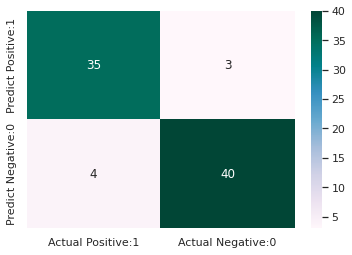

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='PuBuGn')

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        38
           1       0.93      0.91      0.92        44

    accuracy                           0.91        82
   macro avg       0.91      0.92      0.91        82
weighted avg       0.92      0.91      0.91        82



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0854


In [ ]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
model_test['XGBoost']=[f1score , accuracy, precision, recall, classification_error]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)

f1 Score : 0.9195402298850575
Accuracy: 0.9146341463414634
Recall : 0.9090909090909091
Precision : 0.9302325581395349


COMPARISON OF THE ABOVE REGRESSION MODELS

In [ ]:
model_test

{'Logistic Regression': [0.7999999999999999,
  0.7926829268292683,
  0.8292682926829268,
  0.7727272727272727,
  0.2073170731707317],
 'Naive Bayes': [0.7297297297297297,
  0.7560975609756098,
  0.9,
  0.6136363636363636,
  0.24390243902439024],
 'XGBoost': [0.9195402298850575,
  0.9146341463414634,
  0.9302325581395349,
  0.9090909090909091,
  0.08536585365853659]}

In [ ]:
#Mapping the F1 score, accuracy, precision, recall and classification error of all the models
model_comp_data = pd.DataFrame.from_dict(model_test).T
model_comp_data.columns = ['F1 Score','Accuracy','Precision','Recall','Classification Error']
model_comp_data = model_comp_data.sort_values('F1 Score', ascending=True)
model_comp_data.style.background_gradient(cmap='magma')

,F1 Score,Accuracy,Precision,Recall,Classification Error
Naive Bayes,0.729730,0.756098,0.900000,0.613636,0.243902
Logistic Regression,0.800000,0.792683,0.829268,0.772727,0.207317
XGBoost,0.919540,0.914634,0.930233,0.909091,0.085366


EXPLANATION:

XGBoost also shows an accuracy of 91.4634% with a precision of 93.02%

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='F1 Score', y=model_comp_data.index, x=model_comp_data['F1 Score'], orientation='h'),
    go.Bar(name='Accuracy', y=model_comp_data.index, x=model_comp_data['Accuracy'], orientation='h'),
    go.Bar(name='Precision', y=model_comp_data.index, x=model_comp_data['Precision'], orientation='h'),
    go.Bar(name='Recall', y=model_comp_data.index, x=model_comp_data['Recall'], orientation='h'),
    go.Bar(name='Classification Error', y=model_comp_data.index, x=model_comp_data['Classification Error'], orientation='h')
])
fig.update_layout(autosize=False, width=1100,
    height=600,barmode='group')
fig.show()

BEST MODEL:

1. XGBoost is the best model algorithm for our problem: Heart Failure Prediction.
2. As it is clearly visible from our output, XGBoost has the maximum F1 score, maximum accuracy and maximum recall value.
3. XGBoost shows the lowest classification error as well.
4. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.
5. It is extremely useful to solve regression, classification, ranking, and user-defined prediction problems.

In [ ]:
data.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,0
290,45.0,0,615,1,55,0,222000.0,0.8,141,0,0,257,0
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
xg = XGBClassifier(colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.3, reg_lambda=1.2, subsample=0.7)
xg.fit(x_train, y_train)
def XGmodel(x):
    y = xg.predict(x)
    return y